In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
from taigapy import TaigaClient
tc = TaigaClient()
anot = tc.get(name='aneuploidy-data-d0b9', version=19, file='using_ten_percent_NEW')#pd.read_csv('aneuploidy_data_compact.csv',index_col=0)

Taiga needs to convert data before we can fetch it.  Waiting...



[##################]100% |   7.1 MiB/s |   8.9 KiB /   8.9 KiB | ETA:  00:00:00


In [3]:
anot.shape

(198, 6)

In [4]:
anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

In [5]:
from taigapy import TaigaClient
tc = TaigaClient()

gene_effect_rnai_achilles = tc.get(name='demeter2-achilles-5386', version=13, file='gene_effect')
gene_effect_rnai_drive = tc.get(name='demeter2-drive-0591', version=12, file='gene_effect')
#gene_effect_crispr_achilles = tc.get(name='avana-public-tentative-19q4-c2df', version=4, file='gene_effect')

In [6]:
gene_effect_rnai_drive.isna().sum().sort_values().loc['MAD2L1 (4085)']

14

In [7]:
# need to regress out lineage before making these plots! 

sample_info = tc.get(name='internal-19q4-fb11', version=29, file='sample_info')
sample_info.index = sample_info.loc[:,'CCLE_Name'] 
sample_info = sample_info[~sample_info.index.duplicated(keep='first')]

In [8]:
sample_info_depmap = sample_info.copy()
sample_info_depmap.index = sample_info.loc[:,'DepMap_ID']#.loc[gene_effect_rnai_achilles.index,'lineage']

In [9]:
genes = ['BUB1B (701)','MAD2L1 (4085)','KIF18A (81930)']

In [48]:
len(gene_effect_rnai_achilles_.loc[:,genes].loc[anot_CCLE.index,'MAD2L1 (4085)'].dropna())

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]


35

In [10]:
gene_effect_rnai_drive_ = gene_effect_rnai_drive.loc[:,genes]
gene_effect_rnai_achilles_ = gene_effect_rnai_achilles.loc[:,genes]
#gene_effect_crispr_achilles_ = gene_effect_crispr_achilles.loc[:,genes].dropna()



In [11]:
# from sklearn.linear_model import LinearRegression

# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')

# one_hot = pd.get_dummies(sample_info.loc[gene_effect_rnai_achilles.index,'lineage'])
# mu = gene_effect_rnai_achilles_.mean()
# reg = LinearRegression().fit(one_hot, gene_effect_rnai_achilles_)
# preds = pd.DataFrame(reg.predict(one_hot),index = gene_effect_rnai_achilles_.index,columns = gene_effect_rnai_achilles_.columns)

# preds_ = preds 
corrected_rnai_achilles = gene_effect_rnai_achilles_.copy()#((gene_effect_rnai_achilles_  - mu)- preds_)+ mu


In [11]:
# from sklearn.linear_model import LinearRegression

# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')

# one_hot = pd.get_dummies(sample_info_depmap.loc[gene_effect_crispr_achilles.index,'lineage'])
# mu = gene_effect_crispr_achilles_.mean()
# reg = LinearRegression().fit(one_hot, gene_effect_crispr_achilles_)
# preds = pd.DataFrame(reg.predict(one_hot),index = gene_effect_crispr_achilles_.index,columns = gene_effect_crispr_achilles_.columns)

# preds_ = preds 
# corrected_crispr_achilles = ((gene_effect_crispr_achilles_ - mu) - preds_)+ mu



In [12]:
# from sklearn.linear_model import LinearRegression

# from sklearn.preprocessing import OneHotEncoder
# enc = OneHotEncoder(handle_unknown='ignore')

# one_hot = pd.get_dummies(sample_info.loc[gene_effect_rnai_drive_.index,'lineage'])
# mu = gene_effect_rnai_drive_.mean()
# reg = LinearRegression().fit(one_hot, gene_effect_rnai_drive_)
# preds = pd.DataFrame(reg.predict(one_hot),index = gene_effect_rnai_drive_.index,columns = gene_effect_rnai_drive_.columns)

# preds_ = preds 
corrected_rnai_drive = gene_effect_rnai_drive_.copy()#((gene_effect_rnai_drive_ - mu) - preds_)+ mu



In [16]:
high_aneu = anot[anot.loc[:,'many_arm_events'] == True]
low_aneu = anot[anot.loc[:,'many_arm_events'] == False]

In [17]:
# figure 1a
from cds import plotting

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 0.2131468288821823
RNAi Achilles p-value for MAD2L1: 0.0006020573894738504
RNAi Achilles p-value for KIF18A: 0.28885295414718065


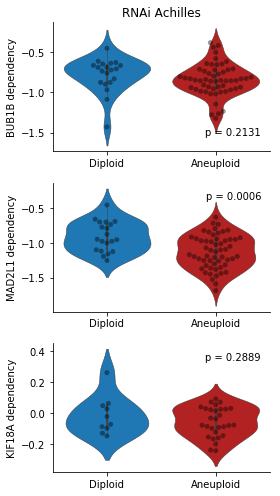

In [20]:
fig,axx = plt.subplots(3,1,figsize=(4,7))

from scipy import stats

shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles.index)
temp = corrected_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])



sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[2],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[2],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[2].set_ylabel('KIF18A dependency')
axx[2].set_xlabel('')

plotting.simpleaxis(axx[2])



plt.tight_layout()


tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'BUB1B (701)'],corrected_rnai_achilles.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'KIF18A (81930)'].dropna(),corrected_rnai_achilles.loc[falsee,'KIF18A (81930)'].dropna())
print('RNAi Achilles p-value for KIF18A: ' + str(p_val))
axx[2].legend(title='p = '+ str(round(p_val,4)),frameon=False)




plt.savefig('review_plots/rnai_achilles_10_percent_NEW.pdf')
# ax = sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5)
# sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4)
# plt.title('RNAi Achilles')
# plt.ylabel('MAD2L1 dependency')
# plt.xlabel('')

# plotting.simpleaxis(ax)

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi drive p-value for BUB1B: 0.0004887792472224415
RNAi drive p-value for MAD2L1: 0.037339850782972764
RNAi drive p-value for KIF18A: 2.5201353007111625e-06


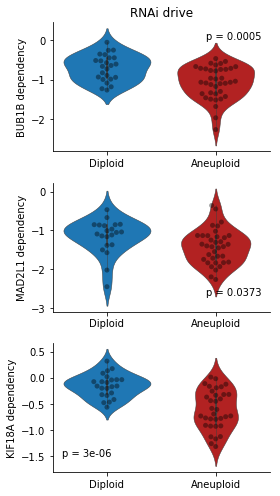

In [21]:
fig,axx = plt.subplots(3,1,figsize=(4,7))

from scipy import stats

shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive.index)
temp = corrected_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])



sns.violinplot(y = 'KIF18A (81930)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[2],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'KIF18A (81930)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[2],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[2].set_ylabel('KIF18A dependency')
axx[2].set_xlabel('')

plotting.simpleaxis(axx[2])



plt.tight_layout()


tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'BUB1B (701)'],corrected_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi drive p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'MAD2L1 (4085)'].dropna(),corrected_rnai_drive.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi drive p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'KIF18A (81930)'].dropna(),corrected_rnai_drive.loc[falsee,'KIF18A (81930)'].dropna())
print('RNAi drive p-value for KIF18A: ' + str(p_val))
axx[2].legend(title='p = '+ str(round(p_val,6)),frameon=False,loc='lower left')




plt.savefig('review_plots/rnai_drive_10_percent_NEW.pdf')
# ax = sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5)
# sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4)
# plt.title('RNAi drive')
# plt.ylabel('MAD2L1 dependency')
# plt.xlabel('')

# plotting.simpleaxis(ax)

In [460]:
temp.shape

(222, 3)

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 0.0008297390263115525
RNAi Achilles p-value for MAD2L1: 0.01997961757155324


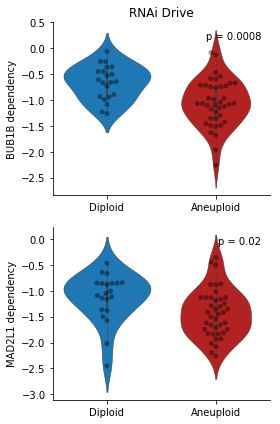

In [24]:
fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive.index)
temp = corrected_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'BUB1B (701)'],corrected_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'MAD2L1 (4085)'],corrected_rnai_drive.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)
plt.savefig('fig2a/rnai_drive_10_percent.png')

# shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive.index)
# temp = gene_effect_rnai_drive.loc[shared]
# temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

# trus = temp[temp.loc[:,'ploidy']==True].index 
# temp.loc[trus,'ploidy']= 'Aneuploid'
# falsee = temp[temp.loc[:,'ploidy']==False].index 
# temp.loc[falsee,'ploidy']=  'Diploid'


# ax = sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5)
# sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4)
# plt.title('RNAi Drive')
# plt.ylabel('BUB1B dependency')
# plt.xlabel('')

# plotting.simpleaxis(ax)

# plt.figure()

# ax = sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5)
# sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4)
# plt.title('RNAi Drive')
# plt.ylabel('MAD2L1 dependency')
# plt.xlabel('')

# plotting.simpleaxis(ax)

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 0.12863076930116016
RNAi Achilles p-value for MAD2L1: 0.059735516922498316


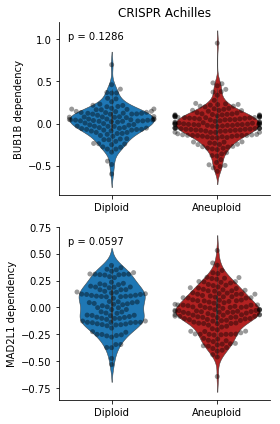

In [468]:
fig,axx = plt.subplots(2,1,figsize=(4,6))
shared = set(anot.index) & set(corrected_crispr_achilles.index)
temp = corrected_crispr_achilles.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('CRISPR Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(corrected_crispr_achilles.loc[trus,'BUB1B (701)'],corrected_crispr_achilles.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_crispr_achilles.loc[trus,'MAD2L1 (4085)'],corrected_crispr_achilles.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,4)),frameon=False)
plt.savefig('fig2a/crispr_achilles_lineage_regressed_out.pdf')


# ax = sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5)
# sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4)
# plt.title('CRISPR Achilles')
# plt.ylabel('BUB1B dependency')
# plt.xlabel('')

# plotting.simpleaxis(ax)

# plt.figure()


# ax = sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5)
# sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4)
# plt.title('CRISPR Achilles')
# plt.ylabel('MAD2L1 dependency')
# plt.xlabel('')
# plotting.simpleaxis(ax)

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 5.469668731900693e-07
RNAi Achilles p-value for MAD2L1: 8.923513542149731e-08


No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 2.729772002847894e-06
RNAi Achilles p-value for MAD2L1: 0.00021131839639715146


No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 0.13869843371847249
RNAi Achilles p-value for MAD2L1: 0.03887471377163116


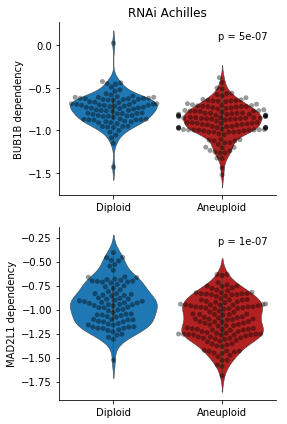

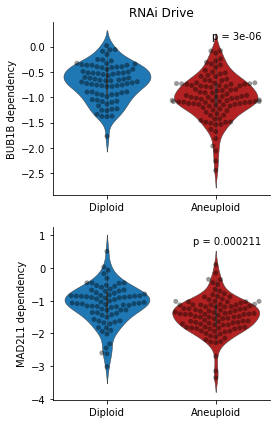

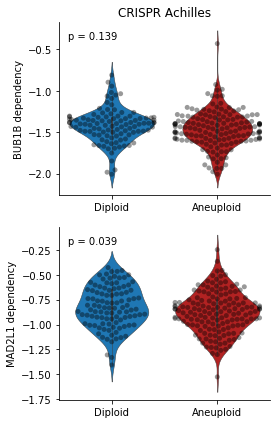

In [469]:
fig,axx = plt.subplots(2,1,figsize=(4,6))
shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_achilles_.index)
temp = gene_effect_rnai_achilles_.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()


tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles_.loc[trus,'BUB1B (701)'],gene_effect_rnai_achilles_.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_achilles_.loc[trus,'MAD2L1 (4085)'],gene_effect_rnai_achilles_.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,7)),frameon=False)

plt.savefig('fig2a/rnai_achilles_orignal.pdf')



# ##########################################################################
fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(gene_effect_rnai_drive_.index)
temp = gene_effect_rnai_drive_.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'


sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Drive')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'BUB1B (701)'],gene_effect_rnai_drive_.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,6)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_rnai_drive_.loc[trus,'MAD2L1 (4085)'],gene_effect_rnai_drive_.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)
plt.savefig('fig2a/rnai_drive_orignal.pdf')

############################################################################


fig,axx = plt.subplots(2,1,figsize=(4,6))
shared = set(anot.index) & set(gene_effect_crispr_achilles_.index)
temp = gene_effect_crispr_achilles_.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'



sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('CRISPR Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi drive')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(gene_effect_crispr_achilles_.loc[trus,'BUB1B (701)'],gene_effect_crispr_achilles_.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)
tt,p_val = stats.ttest_ind(gene_effect_crispr_achilles_.loc[trus,'MAD2L1 (4085)'],gene_effect_crispr_achilles_.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)
plt.savefig('fig2a/crispr_achilles_original.pdf')


In [470]:
#rnai achilles


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles.index)
temp = corrected_rnai_achilles.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'BUB1B (701)'],corrected_rnai_achilles.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))

tt,p_val = stats.ttest_ind(corrected_rnai_achilles.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))

RNAi Achilles p-value for BUB1B: 0.00046865109542830366
RNAi Achilles p-value for MAD2L1: 0.013925804761261467


In [471]:
shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive.index)
temp = corrected_rnai_drive.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'BUB1B (701)'],corrected_rnai_drive.loc[falsee,'BUB1B (701)'])
print('RNAi Drive p-value for BUB1B: ' + str(p_val))

tt,p_val = stats.ttest_ind(corrected_rnai_drive.loc[trus,'MAD2L1 (4085)'].dropna(),corrected_rnai_drive.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi Drive p-value for MAD2L1: ' + str(p_val))

RNAi Drive p-value for BUB1B: 0.001498823847602332
RNAi Drive p-value for MAD2L1: 0.06656449504471526


In [472]:
shared = set(anot.index) & set(corrected_crispr_achilles.index)
temp = corrected_crispr_achilles.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

from scipy import stats
tt,p_val = stats.ttest_ind(corrected_crispr_achilles.loc[trus,'BUB1B (701)'],corrected_crispr_achilles.loc[falsee,'BUB1B (701)'])
print('CRISPR Achilles p-value for BUB1B: ' + str(p_val))

tt,p_val = stats.ttest_ind(corrected_crispr_achilles.loc[trus,'MAD2L1 (4085)'].dropna(),corrected_crispr_achilles.loc[falsee,'MAD2L1 (4085)'].dropna())
print('CRISPR Achilles p-value for MAD2L1: ' + str(p_val))

CRISPR Achilles p-value for BUB1B: 0.12863076930116016
CRISPR Achilles p-value for MAD2L1: 0.059735516922498316


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 1.8014697419912546e-05
RNAi Achilles p-value for MAD2L1: 4.5898291600323375e-07


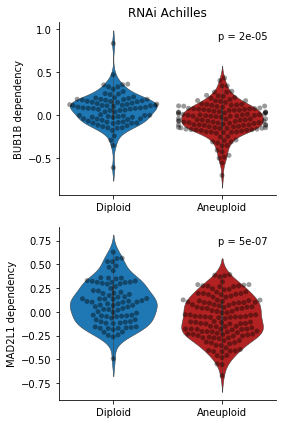

In [473]:
# want to also regress out doubling time
#rnai achilles

from sklearn.linear_model import LinearRegression


for_doubling = anot_CCLE.loc[gene_effect_rnai_achilles_.index,'RNAi_doubling_time'].dropna().index


mu = gene_effect_rnai_achilles_.loc[for_doubling,genes].mean()
reg = LinearRegression().fit(np.array(anot_CCLE.loc[for_doubling,'RNAi_doubling_time']).reshape(-1, 1), gene_effect_rnai_achilles_.loc[for_doubling])
preds = pd.DataFrame(reg.predict(np.array(anot_CCLE.loc[for_doubling,'RNAi_doubling_time']).reshape(-1,1)),index = for_doubling,columns = gene_effect_rnai_achilles_.columns)

preds_ = preds 
corrected_rnai_achilles_doubling_time = ((gene_effect_rnai_achilles_.loc[for_doubling] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles_doubling_time.index)
temp = corrected_rnai_achilles_doubling_time.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_doubling_time.loc[trus,'BUB1B (701)'],corrected_rnai_achilles_doubling_time.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,5)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_doubling_time.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles_doubling_time.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,7)),frameon=False)
plt.savefig('fig2a/rnai_achilles_doubling_time_regressed_out.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Drive p-value for BUB1B: 0.00021075473087045604
RNAi Drive p-value for MAD2L1: 0.002873737028707938


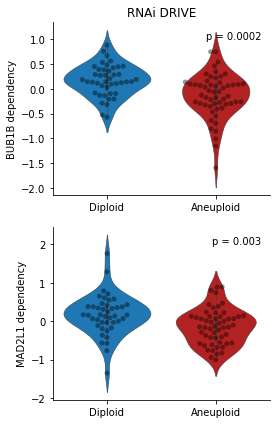

In [474]:
# want to also regress out doubling time
#rnai_drive

from sklearn.linear_model import LinearRegression


for_doubling = anot_CCLE.loc[gene_effect_rnai_drive_.index,'RNAi_doubling_time'].dropna().index


mu = gene_effect_rnai_drive_.loc[for_doubling].mean()
reg = LinearRegression().fit(np.array(anot_CCLE.loc[for_doubling,'RNAi_doubling_time']).reshape(-1, 1), gene_effect_rnai_drive_.loc[for_doubling])
preds = pd.DataFrame(reg.predict(np.array(anot_CCLE.loc[for_doubling,'RNAi_doubling_time']).reshape(-1,1)),index = for_doubling,columns = gene_effect_rnai_drive_.columns)

preds_ = preds 
corrected_rnai_drive_doubling_time = ((gene_effect_rnai_drive_.loc[for_doubling] -mu )- preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive_doubling_time.index)
temp = corrected_rnai_drive_doubling_time.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi DRIVE')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_drive_doubling_time.loc[trus,'BUB1B (701)'],corrected_rnai_drive_doubling_time.loc[falsee,'BUB1B (701)'])
print('RNAi Drive p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,4)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive_doubling_time.loc[trus,'MAD2L1 (4085)'].dropna(),corrected_rnai_drive_doubling_time.loc[falsee,'MAD2L1 (4085)'].dropna())
print('RNAi Drive p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)
plt.savefig('fig2a/rnai_drive_doubling_time_regressed_out.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:961: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return getattr(section, self.name)[new_key]
/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


CRISPR Achilles p-value for BUB1B: 0.06685338962094074
CRISPR Achilles p-value for MAD2L1: 0.23446636848560956


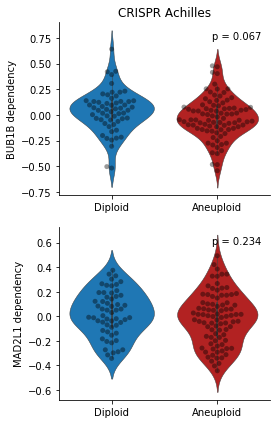

In [475]:
# want to also regress out doubling time
#crispr_achilles

from sklearn.linear_model import LinearRegression


for_doubling = anot.loc[gene_effect_crispr_achilles_.index,'RNAi_doubling_time'].dropna().index


mu = gene_effect_crispr_achilles_.loc[for_doubling].mean()
reg = LinearRegression().fit(np.array(anot.loc[for_doubling,'RNAi_doubling_time']).reshape(-1, 1), gene_effect_crispr_achilles_.loc[for_doubling] )
preds = pd.DataFrame(reg.predict(np.array(anot.loc[for_doubling,'RNAi_doubling_time']).reshape(-1,1)),index = for_doubling,columns = gene_effect_crispr_achilles_.columns)

preds_ = preds 
corrected_crispr_achilles_doubling_time = ((gene_effect_crispr_achilles_.loc[for_doubling] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.index) & set(corrected_crispr_achilles_doubling_time.index)
temp = corrected_crispr_achilles_doubling_time.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('CRISPR Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()



tt,p_val = stats.ttest_ind(corrected_crispr_achilles_doubling_time.loc[trus,'BUB1B (701)'],corrected_crispr_achilles_doubling_time.loc[falsee,'BUB1B (701)'])
print('CRISPR Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_crispr_achilles_doubling_time.loc[trus,'MAD2L1 (4085)'].dropna(),corrected_crispr_achilles_doubling_time.loc[falsee,'MAD2L1 (4085)'].dropna())
print('CRISPR Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)
plt.savefig('fig2a/crispr_achilles_doubling_time_regressed_out.pdf')

In [ ]:
# now make signatures for HET70 and CIN70

In [276]:
public_19Q4_proteincoding_tpm = tc.get(name='depmap-rnaseq-expression-data-ccd0', version=16, file='public_19Q4_proteincoding_tpm')

In [278]:
public_19Q4_proteincoding_tpm.columns = public_19Q4_proteincoding_tpm.columns.str.split(' ').str[0]

In [476]:
cin70 = pd.read_csv('cin70genes.csv',index_col=0,header=None)
het70 = pd.read_csv('het70genes.csv')

In [477]:
big_list_cin70 = []




for i in range(1,14,2):
    big_list_cin70+= list(cin70.index.str.split(' ').str[i].dropna())

In [478]:
list_cin70 = ['TPX2',
 'PRC1',
 'FOXM1',
 'CDC2',
 'TGIF2',
 'MCM2',
 'H2AFZ',
 'TOP2A',
 'PCNA',
 'UBE2C',
 'MELK',
 'TRIP13',
 'CNAP1',
 'MCM7',
 'RNASEH2A',
 'CDC45L',
 'ESPL1',
 'FEN1',
 'CCT5',
 'ATAD2',
 'NUP205',
 'CKS2',
 'ELAVL1',
 'RRM1',
 'AURKB',
 'CTPS',
 'OIP5',
 'PTTG1',
 'MCM10',
 'MTB',
 'ASF1B',
 'CDC6',
 'ACTL6A',
 'GPI',
 'HDGF',
 'NXT1',
 'NEK2',
 'DHCR7',
 'NDUFAB1',
 'KIAA0286',
 'KIF4A',
 'RAD51AP1',
 'MAD2L1',
 'CCNB2',
 'TTK',
 'RFC4',
 'ch-TOG',
 'CDC20',
 'RRM2',
 'CCNB1',
 'MSH6',
 'DKC1',
 'CDCA8',
 'CEP55',
 'LSM4',
 'ZWINT',
 'UNG',
 'SFRS2',
 'STK6',
 'KIF20A',
 'EZH2',
 'H2AFX',
 'TOPK',
 'MTCH2',
 'CMAS',
 'FLJ10036',
 'RAD21',
 'BRRN1',
 'CDCA3',
 'ECT2']

In [479]:
het70_genes = het70.drop([0]).values[:,0]



In [480]:
# now create our signature scores

cin70_scores = public_19Q4_proteincoding_tpm.loc[:,list_cin70].mean(axis=1)
het70_scores = public_19Q4_proteincoding_tpm.loc[:,het70_genes].mean(axis=1)

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [481]:
public_19Q4_proteincoding_tpm_CCLE = public_19Q4_proteincoding_tpm.copy()

public_19Q4_proteincoding_tpm_CCLE.index = sample_info_depmap.loc[public_19Q4_proteincoding_tpm_CCLE.index,'CCLE_Name']

In [482]:
cin70_scores_CCLE = public_19Q4_proteincoding_tpm_CCLE.loc[:,list_cin70].mean(axis=1)
het70_scores_CCLE = public_19Q4_proteincoding_tpm_CCLE.loc[:,het70_genes].mean(axis=1)

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi Achilles p-value for BUB1B: 9.694305329850311e-07
RNAi Achilles p-value for MAD2L1: 4.341754580958979e-06


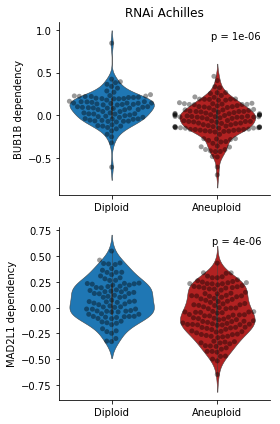

In [483]:
# want to also regress out Het70 scores
#rnai achilles

for_het = anot_CCLE.index & gene_effect_rnai_achilles_.index & het70_scores_CCLE.index


mu = gene_effect_rnai_achilles_.loc[for_het].mean()
reg = LinearRegression().fit(np.array(het70_scores_CCLE.loc[for_het]).reshape(-1, 1), gene_effect_rnai_achilles_.loc[for_het])
preds = pd.DataFrame(reg.predict(np.array(het70_scores_CCLE.loc[for_het]).reshape(-1,1)),index = for_het,columns = gene_effect_rnai_achilles_.columns)

preds_ = preds 
corrected_rnai_achilles_het_70 = ((gene_effect_rnai_achilles_.loc[for_het] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles_het_70.index)
temp = corrected_rnai_achilles_het_70.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_het_70.loc[trus,'BUB1B (701)'],corrected_rnai_achilles_het_70.loc[falsee,'BUB1B (701)'])
print('RNAi Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_het_70.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles_het_70.loc[falsee,'MAD2L1 (4085)'])
print('RNAi Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,6)),frameon=False)
plt.savefig('fig2a/rnai_achilles_het_70_regressed_out.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi DRIVE p-value for BUB1B: 9.289748660354085e-07
RNAi DRIVE p-value for MAD2L1: 0.00132501214877751


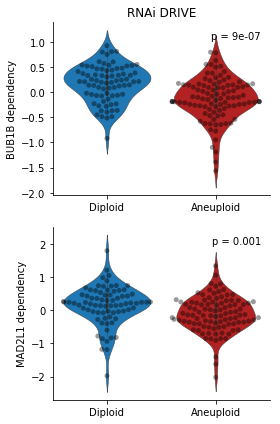

In [484]:
# want to also regress out Het70 scores
#rnai_drive

for_het = anot_CCLE.index & gene_effect_rnai_drive_.index & het70_scores_CCLE.index


mu = gene_effect_rnai_drive_.loc[for_het].mean()
reg = LinearRegression().fit(np.array(het70_scores_CCLE.loc[for_het]).reshape(-1, 1), gene_effect_rnai_drive_.loc[for_het] )
preds = pd.DataFrame(reg.predict(np.array(het70_scores_CCLE.loc[for_het]).reshape(-1,1)),index = for_het,columns = gene_effect_rnai_drive_.columns)

preds_ = preds 
corrected_rnai_drive_het_70 = ((gene_effect_rnai_drive_.loc[for_het] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive_het_70.index)
temp = corrected_rnai_drive_het_70.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi DRIVE')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_drive_het_70.loc[trus,'BUB1B (701)'],corrected_rnai_drive_het_70.loc[falsee,'BUB1B (701)'])
print('RNAi DRIVE p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive_het_70.loc[trus,'MAD2L1 (4085)'],corrected_rnai_drive_het_70.loc[falsee,'MAD2L1 (4085)'])
print('RNAi DRIVE p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)

plt.savefig('fig2a/rnai_drive_het_70_regressed_out.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


CRISPR Achilles p-value for BUB1B: 0.027263333266732023
CRISPR Achilles p-value for MAD2L1: 0.02196954556320914


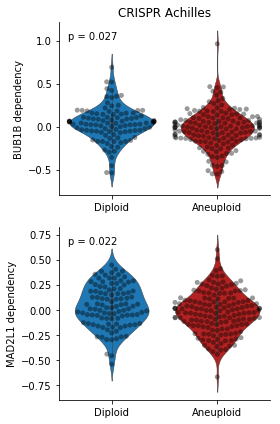

In [485]:
# want to also regress out Het70 scores
#crispr_achilles

for_het = anot.index & gene_effect_crispr_achilles_.index & het70_scores.index


mu = gene_effect_crispr_achilles_.loc[for_het].mean()
reg = LinearRegression().fit(np.array(het70_scores.loc[for_het]).reshape(-1, 1), gene_effect_crispr_achilles_.loc[for_het] )
preds = pd.DataFrame(reg.predict(np.array(het70_scores.loc[for_het]).reshape(-1,1)),index = for_het,columns = gene_effect_crispr_achilles_.columns)

preds_ = preds 
corrected_crispr_achilles_het_70 = ((gene_effect_crispr_achilles_.loc[for_het] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.index) & set(corrected_crispr_achilles_het_70.index)
temp = corrected_crispr_achilles_het_70.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('CRISPR Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_crispr_achilles_het_70.loc[trus,'BUB1B (701)'],corrected_crispr_achilles_het_70.loc[falsee,'BUB1B (701)'])
print('CRISPR Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_crispr_achilles_het_70.loc[trus,'MAD2L1 (4085)'],corrected_crispr_achilles_het_70.loc[falsee,'MAD2L1 (4085)'])
print('CRISPR Achilles p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)
plt.savefig('fig2a/crispr_achilles_het_70_regressed_out.pdf')



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi DRIVE p-value for BUB1B: 4.0145367309090894e-07
RNAi DRIVE p-value for MAD2L1: 8.962120092689578e-08


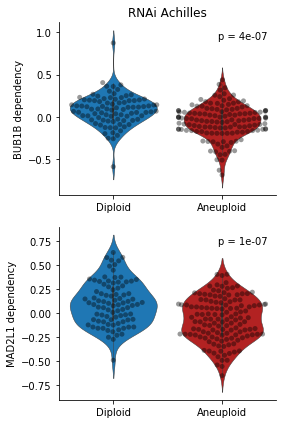

In [486]:
# want to also regress out cin70 scores
#rnai_achilles

for_cin = anot_CCLE.index & gene_effect_rnai_achilles_.index & cin70_scores_CCLE.index


mu = gene_effect_rnai_achilles_.loc[for_cin].mean()
reg = LinearRegression().fit(np.array(cin70_scores_CCLE.loc[for_cin]).reshape(-1, 1), gene_effect_rnai_achilles_.loc[for_cin] )
preds = pd.DataFrame(reg.predict(np.array(cin70_scores_CCLE.loc[for_cin]).reshape(-1,1)),index = for_cin,columns = gene_effect_rnai_achilles_.columns)

preds_ = preds 
corrected_rnai_achilles_cin_70 = ((gene_effect_rnai_achilles_.loc[for_cin] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_achilles_cin_70.index)
temp = corrected_rnai_achilles_cin_70.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_cin_70.loc[trus,'BUB1B (701)'],corrected_rnai_achilles_cin_70.loc[falsee,'BUB1B (701)'])
print('RNAi DRIVE p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_achilles_cin_70.loc[trus,'MAD2L1 (4085)'],corrected_rnai_achilles_cin_70.loc[falsee,'MAD2L1 (4085)'])
print('RNAi DRIVE p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,7)),frameon=False)
plt.savefig('fig2a/rnai_achilles_cin_70_regressed_out.pdf')


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


RNAi DRIVE p-value for BUB1B: 4.848415702495521e-07
RNAi DRIVE p-value for MAD2L1: 5.6099001727644875e-05


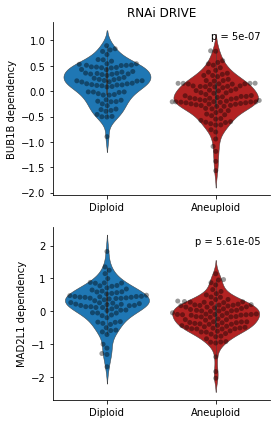

In [487]:
# want to also regress out cin70 scores
#rnai_drive

for_cin = anot_CCLE.index & gene_effect_rnai_drive_.index & cin70_scores_CCLE.index


mu = gene_effect_rnai_drive_.loc[for_cin].mean()
reg = LinearRegression().fit(np.array(cin70_scores_CCLE.loc[for_cin]).reshape(-1, 1), gene_effect_rnai_drive_.loc[for_cin])
preds = pd.DataFrame(reg.predict(np.array(cin70_scores_CCLE.loc[for_cin]).reshape(-1,1)),index = for_cin,columns = gene_effect_rnai_drive_.columns)

preds_ = preds 
corrected_rnai_drive_cin_70 = ((gene_effect_rnai_drive_.loc[for_cin] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.loc[:,'CCLE_ID']) & set(corrected_rnai_drive_cin_70.index)
temp = corrected_rnai_drive_cin_70.loc[shared]
temp['ploidy'] = anot_CCLE.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('RNAi DRIVE')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_rnai_drive_cin_70.loc[trus,'BUB1B (701)'],corrected_rnai_drive_cin_70.loc[falsee,'BUB1B (701)'])
print('RNAi DRIVE p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,7)),frameon=False)
tt,p_val = stats.ttest_ind(corrected_rnai_drive_cin_70.loc[trus,'MAD2L1 (4085)'],corrected_rnai_drive_cin_70.loc[falsee,'MAD2L1 (4085)'])
print('RNAi DRIVE p-value for MAD2L1: ' + str(p_val))
axx[1].legend(title='p = '+ str(round(p_val,7)),frameon=False)


plt.savefig('fig2a/rnai_drive_cin_70_regressed_out.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.
No handles with labels found to put in legend.


CRISPR Achilles p-value for BUB1B: 0.14025639184441568
CRISPR Achilles p-value for MAD2L1: 0.03896243460703534


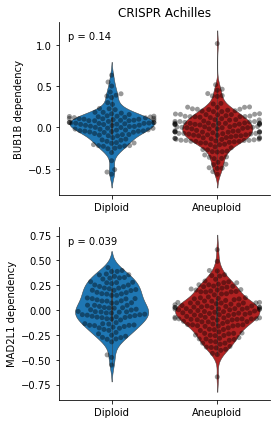

In [488]:
# want to also regress out cin70 scores
#crispr_achilles

for_cin = anot.index & gene_effect_crispr_achilles_.index & cin70_scores.index


mu = gene_effect_crispr_achilles_.loc[for_cin].mean()
reg = LinearRegression().fit(np.array(cin70_scores.loc[for_cin]).reshape(-1, 1), gene_effect_crispr_achilles_.loc[for_cin])
preds = pd.DataFrame(reg.predict(np.array(cin70_scores.loc[for_cin]).reshape(-1,1)),index = for_cin,columns = gene_effect_crispr_achilles_.columns)

preds_ = preds 
corrected_crispr_achilles_cin_70 = ((gene_effect_crispr_achilles_.loc[for_cin] - mu) - preds_)+ mu







fig,axx = plt.subplots(2,1,figsize=(4,6))


shared = set(anot.index) & set(corrected_crispr_achilles_cin_70.index)
temp = corrected_crispr_achilles_cin_70.loc[shared]
temp['ploidy'] = anot.loc[temp.index,'many_arm_events']

trus = temp[temp.loc[:,'ploidy']==True].index 
temp.loc[trus,'ploidy']= 'Aneuploid'
falsee = temp[temp.loc[:,'ploidy']==False].index 
temp.loc[falsee,'ploidy']=  'Diploid'

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
sns.violinplot(y = 'BUB1B (701)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[0],order=['Diploid','Aneuploid'],palette=my_pal)   
sns.swarmplot(y = 'BUB1B (701)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[0],order=['Diploid','Aneuploid'])
axx[0].set_title('CRISPR Achilles')
axx[0].set_ylabel('BUB1B dependency')
axx[0].set_xlabel('')

plotting.simpleaxis(axx[0])


# plt.figure()
sns.violinplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,saturation=1,linewidth=.5,ax=axx[1],order=['Diploid','Aneuploid'],palette=my_pal)
sns.swarmplot(y = 'MAD2L1 (4085)',x='ploidy', data = temp,color='black',alpha=.4,ax=axx[1],order=['Diploid','Aneuploid'])
#axx[1].set_title('RNAi Achilles')
axx[1].set_ylabel('MAD2L1 dependency')
axx[1].set_xlabel('')

plotting.simpleaxis(axx[1])
plt.tight_layout()




from scipy import stats
tt,p_val = stats.ttest_ind(corrected_crispr_achilles_cin_70.loc[trus,'BUB1B (701)'],corrected_crispr_achilles_cin_70.loc[falsee,'BUB1B (701)'])
print('CRISPR Achilles p-value for BUB1B: ' + str(p_val))
axx[0].legend(title='p = '+ str(round(p_val,3)),frameon=False)

tt,p_val = stats.ttest_ind(corrected_crispr_achilles_cin_70.loc[trus,'MAD2L1 (4085)'],corrected_crispr_achilles_cin_70.loc[falsee,'MAD2L1 (4085)'])
print('CRISPR Achilles p-value for MAD2L1: ' + str(p_val))

axx[1].legend(title='p = '+ str(round(p_val,3)),frameon=False)
plt.savefig('fig2a/crispr_achilles_cin_70_regressed_out.pdf')

